In [8]:
from spacerocks import SpaceRock
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
t0 = 2459142.5
def H(t):
    return 8 + 0.4 * np.sin(2*np.pi*(t - t0)/0.3 - 0.2) * np.cos(2*np.pi*(t - t0)/0.12 + 0.9)

In [83]:
rock = SpaceRock(a=40, 
                 e=0.3,
                 inc=8, 
                 node=246, 
                 varpi=193, 
                 M=15, 
                 epoch=t0, 
                 H=H, 
                 origin='ssb', 
                 frame='eclipJ2000')

epochs = np.linspace(2459142.5, 2459142.5+1, 2000)
prop, planets, sim = rock.propagate(epochs=epochs, model=1)
obs = prop.observe(obscode='W84')

In [84]:
dt = (prop.epoch.jd - prop.epoch.jd[0]) * 24 # time in hours

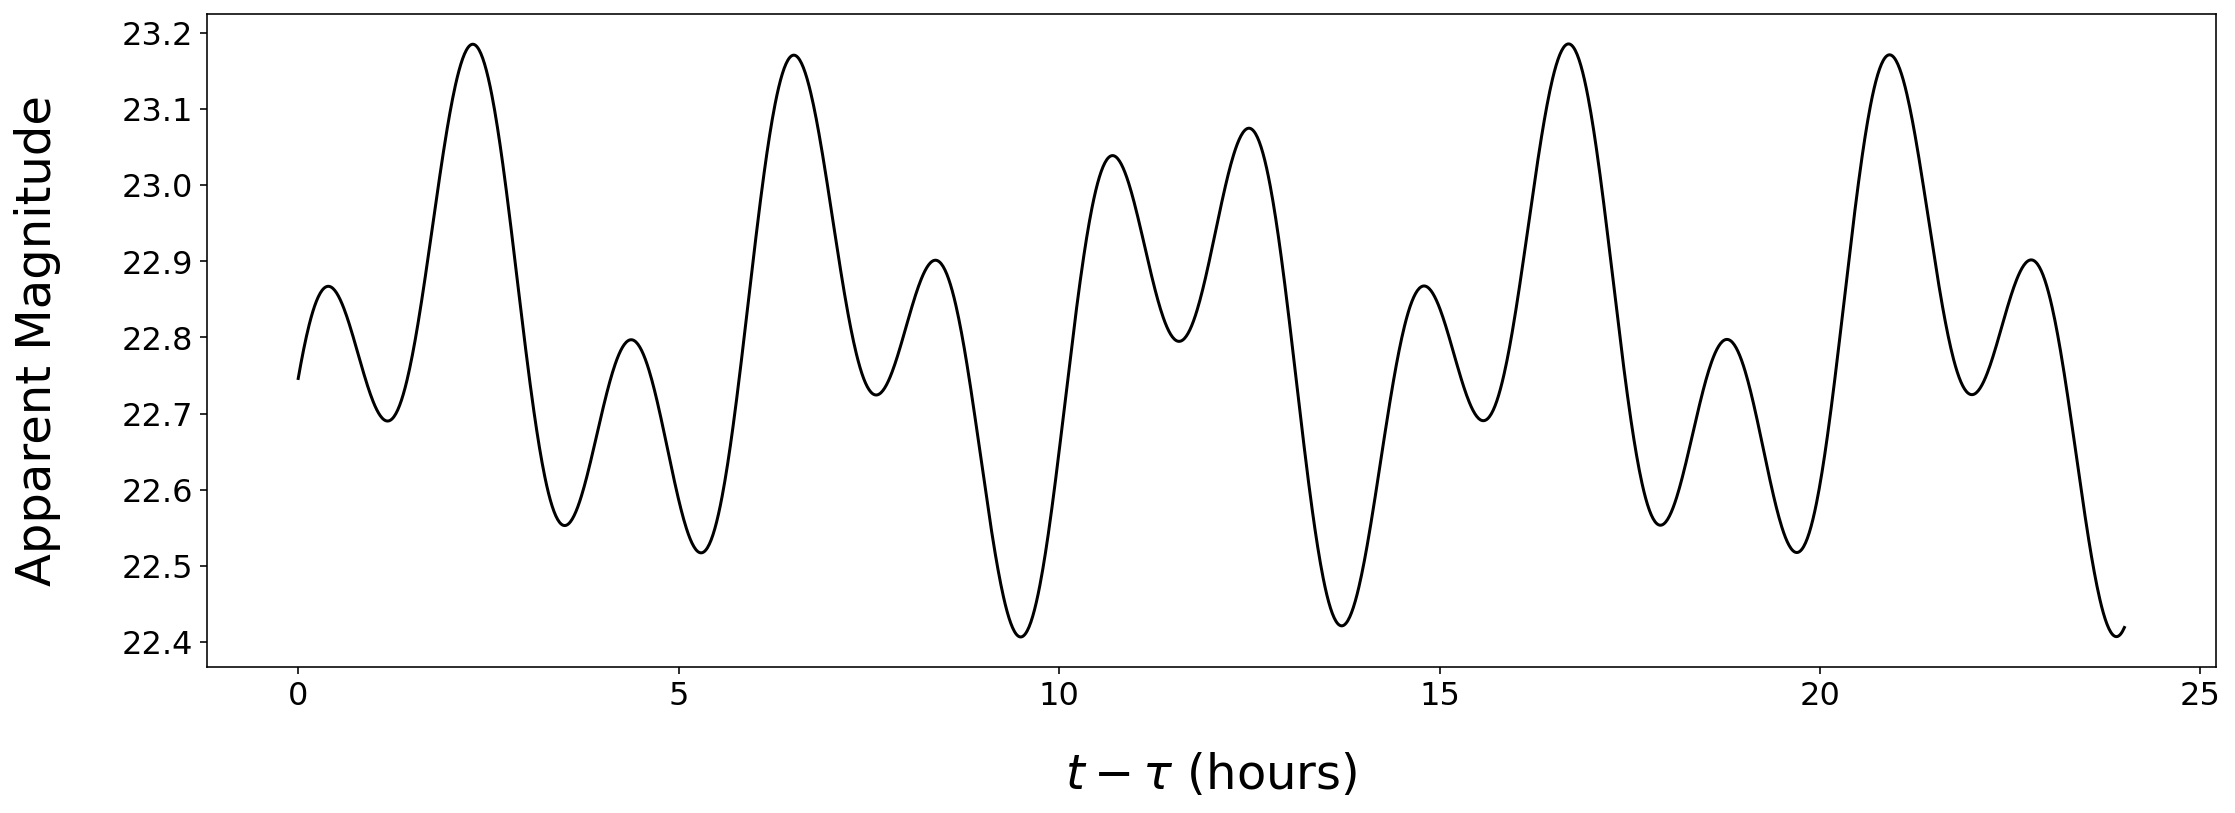

In [85]:
fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(dt, obs.mag, color='black')
ax.set_xlabel(r'$t - \tau$ (hours)', fontsize=24, labelpad=20)
ax.set_ylabel(r'Apparent Magnitude', fontsize=24, labelpad=30)
ax.tick_params(labelsize=16)